### 상관분석
---

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# 폰트 한글화
from matplotlib import pyplot as plt, font_manager

# font_path = "C:/Users/user/AppData/Local/Microsoft/Windows/Fonts/AppleSDGothicNeoM.ttf"
# font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(30, 25))


<Figure size 2160x1800 with 0 Axes>

<Figure size 2160x1800 with 0 Axes>

In [3]:
df = pd.read_csv('result/부산_동별_방제취약지수_최종.csv')
df.head(2)

,통합동,구,총인구,세대수,평균기온,최고기온,최저기온,강수량,습도,공원개수,가로수개수,공간유형,주거지부,공원부,수변부,해충지수,방제취약지수,방제취약지수2
0,가덕도동,강서구,2416,3904,27.6118,32.3226,24.5484,556.6129,84.6371,2,2,주거지부,56.6548,38.1382,148.4496,205.4727,120.6638,153.7868
1,가락동,강서구,1357,2452,28.1639,33.2903,24.9677,548.6774,83.9462,0,0,수변부,57.4240,41.0330,150.7779,210.9522,122.2653,101.5915


In [4]:
dfdf = df[['총인구', '평균기온', '최고기온', '최저기온', '강수량', '공원개수', '가로수개수', '방제취약지수']]
dfdf.columns = ['총인구', '평균기온', '최고기온', '최저기온', '강수량', '공원개수', '가로수개수', '해충지수']
dfdf.head()

,총인구,평균기온,최고기온,최저기온,강수량,공원개수,가로수개수,해충지수
0,2416,27.6118,32.3226,24.5484,556.6129,2,2,120.6638
1,1357,28.1639,33.2903,24.9677,548.6774,0,0,122.2653
2,17377,27.1467,32.0000,24.3226,537.0323,3,7,121.8619
3,9544,26.9797,30.4194,24.7419,528.5161,3,7,124.5438
4,7241,28.1855,33.1613,25.1935,544.1290,1,5,125.2771


In [5]:
# 피어슨 상관계수
corr = dfdf.corr(method='pearson')
corr

,총인구,평균기온,최고기온,최저기온,강수량,공원개수,가로수개수,해충지수
총인구,1.000000,-0.004052,0.019174,-0.029873,-0.143511,0.587546,0.534874,0.404131
평균기온,-0.004052,1.000000,0.874063,0.383816,0.362043,-0.030318,0.008712,0.311526
최고기온,0.019174,0.874063,1.000000,-0.048939,0.546790,-0.021930,-0.091746,0.008489
최저기온,-0.029873,0.383816,-0.048939,1.000000,-0.533337,0.052156,0.144214,0.661921
강수량,-0.143511,0.362043,0.546790,-0.533337,1.000000,-0.226235,-0.169537,-0.424294
공원개수,0.587546,-0.030318,-0.021930,0.052156,-0.226235,1.000000,0.543632,0.453105
가로수개수,0.534874,0.008712,-0.091746,0.144214,-0.169537,0.543632,1.000000,0.819281
해충지수,0.404131,0.311526,0.008489,0.661921,-0.424294,0.453105,0.819281,1.000000


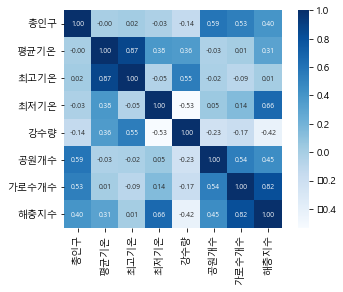

In [12]:
# 히트맵
df_heat = sns.heatmap(corr, cbar=True, annot=True, annot_kws={
                       'size': 7,}, fmt='.2f', square=True, cmap='Blues')


In [7]:
import statsmodels.formula.api as smf

In [ ]:
res = smf.ols(formula='방제취약지수~평균기온+최고기온+최저기온', data=df).fit()
res.summary()

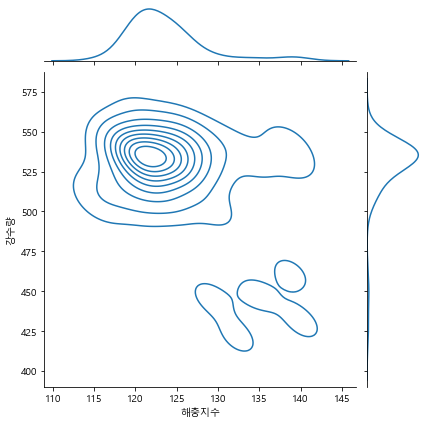

In [50]:
sns.jointplot(data=dfdf, x='해충지수', y='강수량', kind='kde')


In [49]:
pearson = stats.pearsonr(dfdf['해충지수'], dfdf['강수량'])
pearson

(-0.42429425771769663, 7.952112710307714e-06)

In [43]:
ttest = stats.ttest_ind(df['최저기온'], df['해충지수'])
ttest


Ttest_indResult(statistic=-336.79861878902915, pvalue=4.6357500083914165e-282)

In [ ]:
# 시각화 해보기
sns.pairplot(dfdf, kind='reg')

In [33]:
plt.style.use('default')

In [10]:
dfdf = df[['총인구', '평균기온', '최고기온', '최저기온', '강수량', '공원개수', '가로수개수', '방제취약지수']]
dfdf.columns = ['총인구', '평균기온', '최고기온', '최저기온', '강수량', '공원개수', '가로수개수', '해충지수']
dfdf.head()

,총인구,평균기온,최고기온,최저기온,강수량,공원개수,가로수개수,해충지수
0,2416,27.6118,32.3226,24.5484,556.6129,2,2,120.6638
1,1357,28.1639,33.2903,24.9677,548.6774,0,0,122.2653
2,17377,27.1467,32.0000,24.3226,537.0323,3,7,121.8619
3,9544,26.9797,30.4194,24.7419,528.5161,3,7,124.5438
4,7241,28.1855,33.1613,25.1935,544.1290,1,5,125.2771


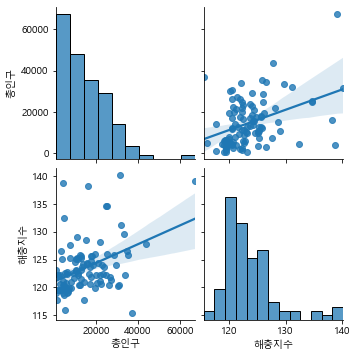

In [11]:
# 인구수랑 해충지수
pop_df = dfdf[['총인구', '해충지수']]
sns.pairplot(pop_df, kind='reg')

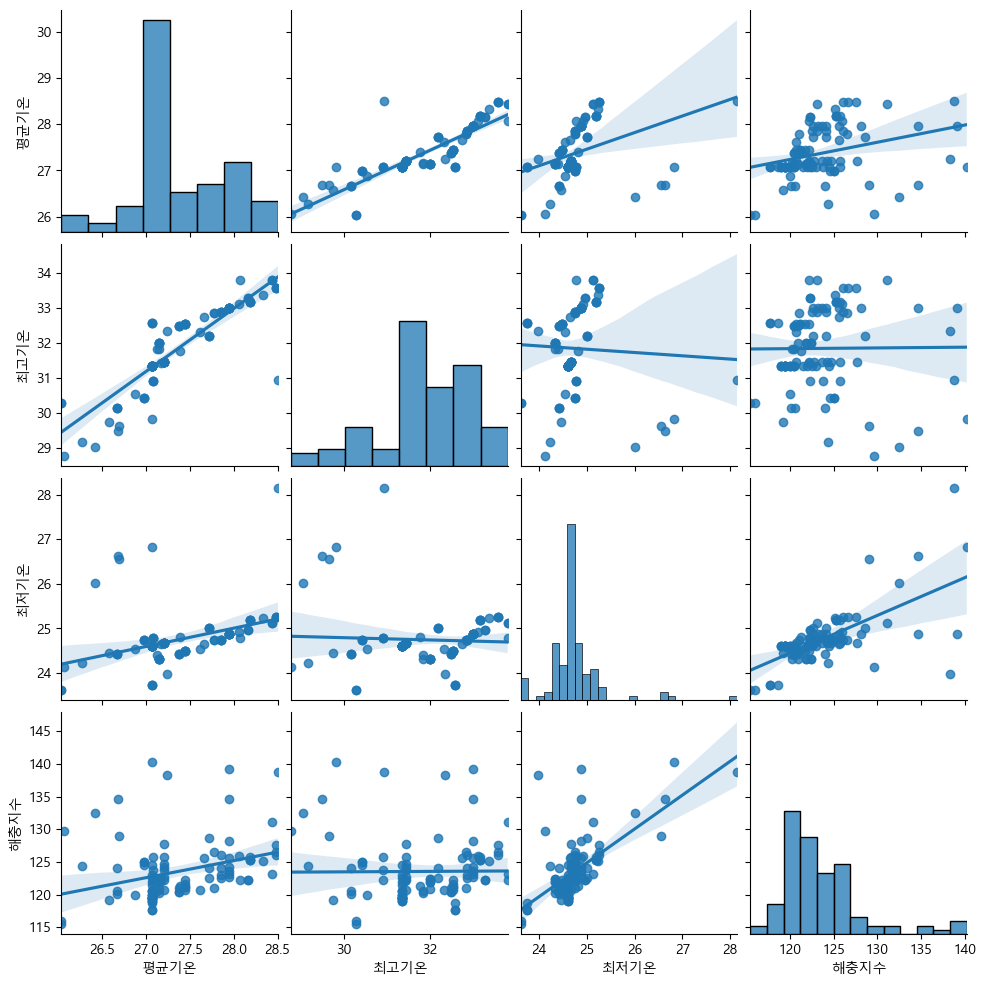

In [42]:
# 기온과 해충지수
weather_df = dfdf[['평균기온', '최고기온', '최저기온', '해충지수']]
sns.pairplot(weather_df, kind='reg')

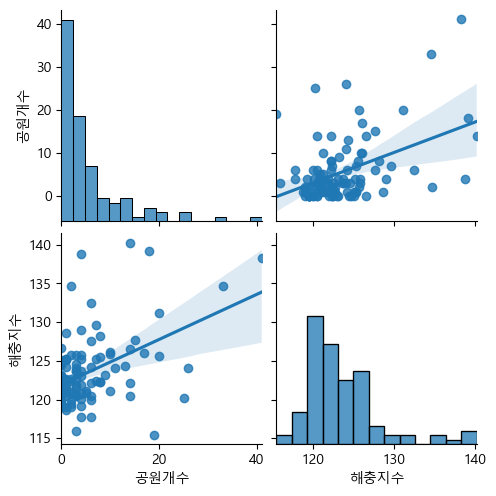

In [43]:
# 공원개수와 해충지수
park_df = dfdf[['공원개수', '해충지수']]
sns.pairplot(park_df, kind='reg')

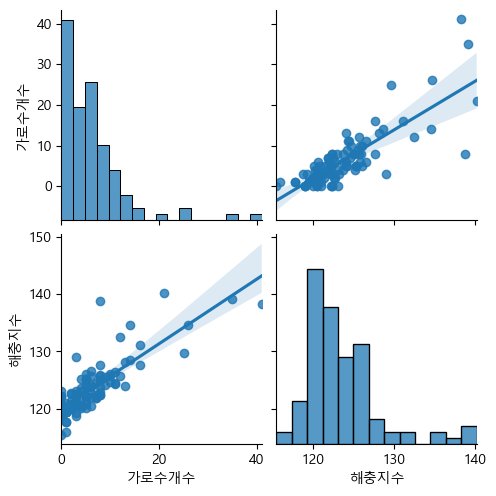

In [44]:
# 가로수개수와 해충지수
tree_df = dfdf[['가로수개수', '해충지수']]
sns.pairplot(tree_df, kind='reg')

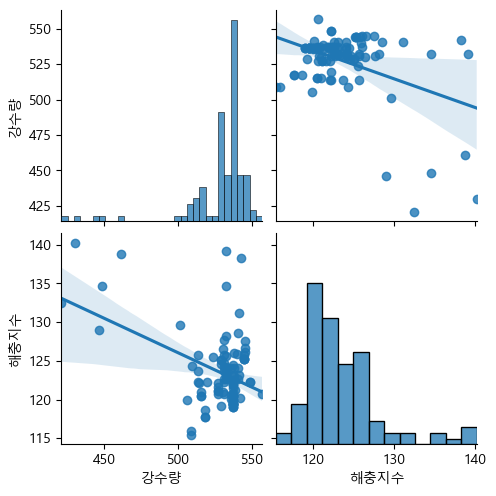

In [45]:
# 강수량과 해충지수
preci_df = dfdf[['강수량', '해충지수']]
sns.pairplot(preci_df, kind='reg')